# COMP257 Portfolio 1

### Matthew Seery
### 44760442

## Compiling Data for Rider in Race 1

In [1]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
%matplotlib inline
tree = ET.parse('files/race1.gpx')
root = tree.getroot()
data = []

# Define a namespace dictionary to make element names simpler.
# This mirrors the namespace definintions in the XML files.
ns = {'gpx':'http://www.topografix.com/GPX/1/1',
 'gpxtpx': 'http://www.garmin.com/xmlschemas/TrackPointExtension/v1'}

# When we look for elements, we need to use the namespace prefix.
trk = root.find('gpx:trk', ns)
trkseg = trk.find('gpx:trkseg', ns)

In [2]:
# Extract attributes from race1.gpx file
for trkpt in trkseg[:]:
    # Get properties from the attributes
    lat = trkpt.attrib['lat']
    lat = float(lat)
    lon = trkpt.attrib['lon']
    lon = float(lon)

    # Get values from the child elements
    ele = trkpt.find('gpx:ele', ns).text
    ele = float(ele)
    time = trkpt.find('gpx:time', ns).text
    
    # Get values from the extensions
    ext = trkpt.find('gpx:extensions', ns)
    pw = ext.find('gpx:power', ns).text
    pw = int(pw)
    tpext = ext.find('gpxtpx:TrackPointExtension', ns)
    temp = tpext.find('gpxtpx:atemp', ns).text
    hr = tpext.find('gpxtpx:hr', ns).text
    hr = int(hr)
    cad = tpext.find('gpxtpx:cad', ns).text
    cad = int(cad)
    
    # Append row of data
    data.append([lat,lon,ele,time,pw,temp,hr,cad])

# Add column names to the dataframe
column_names = ['Latitude','Longitude','Elevation','Time','Power','Temperature','Heart Rate','Cadence']
df = pd.DataFrame(data,columns=column_names)
df.head()

Latitude   Longitude  Elevation                  Time  Power Temperature  \
0 -33.816178  150.871032       73.0  2017-07-08T22:05:45Z      0           7   
1 -33.816150  150.871035       73.0  2017-07-08T22:05:46Z      0           7   
2 -33.816117  150.871044       73.0  2017-07-08T22:05:47Z      0           7   
3 -33.816082  150.871054       73.0  2017-07-08T22:05:48Z      0           7   
4 -33.816043  150.871069       73.0  2017-07-08T22:05:49Z    197           7   

   Heart Rate  Cadence  
0         115       27  
1         115       27  
2         115       27  
3         115       27  
4         115       27

##  
## Average Speed for Rider in Race 1
The average speed of the rider is 10.2 m/s (36.6 km/hr).

In [3]:
# Use the haversine formula to calculate distances.
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    """
    
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371000
    return c * r

In [4]:
# Calculate distance in metres using Latitude and Longitude
n = df.shape[0]
distance = []
lat = df['Latitude']
lon = df['Longitude']
for i in range (0, n):
    d = df.index[i]
    if d == 0:
        distance.append(0)
    else:
        h = haversine(lat[i - 1], lon[i - 1], lat[i], lon[i])
        distance.append(h)
        
# Create Speed(m/s) column using values from the distance array
df['Speed (m/s)'] = distance
df.head()

Latitude   Longitude  Elevation                  Time  Power Temperature  \
0 -33.816178  150.871032       73.0  2017-07-08T22:05:45Z      0           7   
1 -33.816150  150.871035       73.0  2017-07-08T22:05:46Z      0           7   
2 -33.816117  150.871044       73.0  2017-07-08T22:05:47Z      0           7   
3 -33.816082  150.871054       73.0  2017-07-08T22:05:48Z      0           7   
4 -33.816043  150.871069       73.0  2017-07-08T22:05:49Z    197           7   

   Heart Rate  Cadence  Speed (m/s)  
0         115       27     0.000000  
1         115       27     3.125769  
2         115       27     3.762453  
3         115       27     3.999970  
4         115       27     4.552631

In [5]:
avgspeed = round(df['Speed (m/s)'].mean(),1)
avgspeedkm = round(3.6*df['Speed (m/s)'].mean(),1)
print('The average speed of the rider is',avgspeed,'m/s ('+ str(avgspeedkm),'km/hr)')

The average speed of the rider is 10.2 m/s (36.6 km/hr)


##  
## Distribution of Speed
The distribution is slightly skewed to the right.

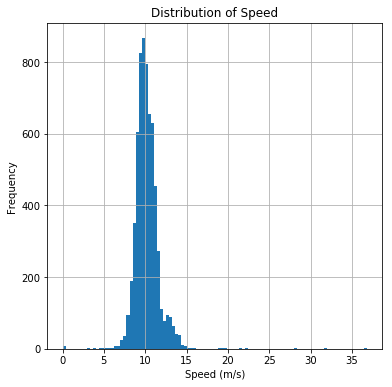

In [6]:
s = df['Speed (m/s)']
s.hist(normed = 0, histtype = 'stepfilled', bins = 100, figsize=(6,6))
plt.title('Distribution of Speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')

##  
## Distribution of Heart Rate
The distribution is skewed to the right.

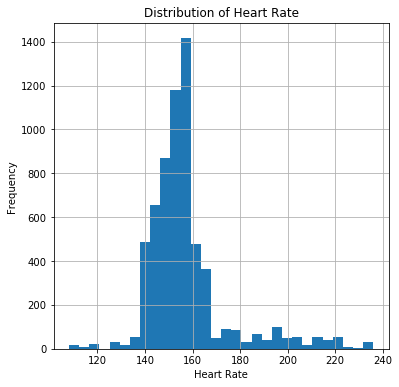

In [7]:
hr = df['Heart Rate'].astype(int)
hr.hist(normed = 0, histtype = 'stepfilled', bins = 30, figsize=(6,6))
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')

##  
## Distribution of Power
Despite the high frequency of 0 recorded for power the histogram still shows a significant skew to the right for the remaining values.

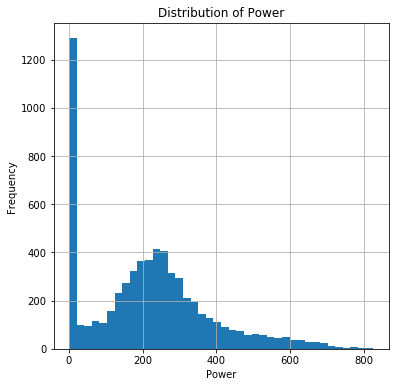

In [8]:
pw = df['Power'].astype(int)
pw.hist(normed = 0, histtype = 'stepfilled', bins = 40, figsize=(6,6))
plt.title('Distribution of Power')
plt.xlabel('Power')
plt.ylabel('Frequency')

##  
## Power vs Speed Plot
There does not appear to be a relationship between power and speed. Most of the speeds recorded are between 5 and 15 m/s. The values in this range are spread fairly consistently across all but the most highest values for power.

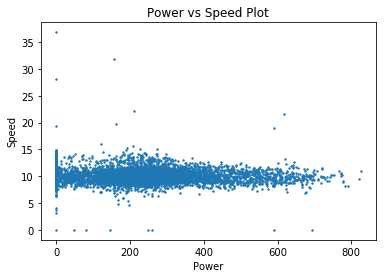

In [9]:
# Plot power vs speed
plt.scatter(pw, s, s = 2)
plt.title('Power vs Speed Plot')
plt.xlabel('Power')
plt.ylabel('Speed')

##  
## Power vs Heart Rate Plot
Compared to speed in the previous scatterplot, there is more variation with the heart rate values. However, the majority of values are still restricted in a narrow range between approximately 135 and 170. Again, like the Power vs Speed scatterplot, the values are spread fairly evenly across all but the highest values for power. Therefore, there is no noticeable relationship between power and heart rate.

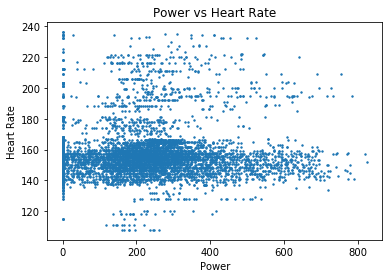

In [10]:
# Plot power vs heart rate
plt.scatter(pw, hr, s = 2)
plt.title('Power vs Heart Rate')
plt.xlabel('Power')
plt.ylabel('Heart Rate')

##  
## Laps Completed By Rider in Race 1

In [11]:
# Calculate the number of laps completed by the rider in race 1
increasing = True
count = 0
for i in range (1,df.shape[0]):
    if increasing == True and lat[i] < lat[i - 1] and lat[i] < lat[0]:
        increasing = False
    
    if  (increasing == False and lat[i] > lat[0] and lat[i] > lat[i - 1] and df.index[i-1] != 0):
        count = count + 1
        increasing = True
        
print('The number of laps completed by the rider in race 1 is',str(count)+'.')

The number of laps completed by the rider in race 1 is 18.


##### Plotting either the latitude or longitude against the number of observations also shows that 18 laps were completed by the rider in race 1.

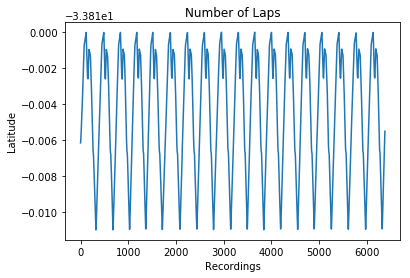

In [12]:
# Laps completed by rider using a plot of Latitude results
plt.plot(df.index, lat)
plt.title('Number of Laps')
plt.xlabel('Recordings')
plt.ylabel('Latitude')

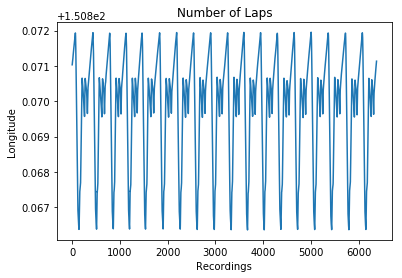

In [13]:
# Laps completed by rider using a plot of Longitude results
plt.plot(df.index, lon)
plt.title('Number of Laps')
plt.xlabel('Recordings')
plt.ylabel('Longitude')

##  
## Compiling Data for Rider in Race 2

In [14]:
tree2 = ET.parse('files/race2.gpx')
root2 = tree2.getroot()
data2 = []

# Define a namespace dictionary to make element names simpler.
# This mirrors the namespace definintions in the XML files.
ns2 = {'gpx':'http://www.topografix.com/GPX/1/1',
 'gpxtpx': 'http://www.garmin.com/xmlschemas/TrackPointExtension/v1'}

# When we look for elements, we need to use the namespace prefix.
trk2 = root2.find('gpx:trk', ns)
trkseg2 = trk2.find('gpx:trkseg', ns)

In [15]:
# Extract attributes from race2.gpx file
for trkpt2 in trkseg2[:]:
    # Get properties from the attributes
    lat2 = trkpt2.attrib['lat']
    lat2 = float(lat2)
    lon2 = trkpt2.attrib['lon']
    lon2 = float(lon2)

    # Get values from the child elements
    ele2 = trkpt2.find('gpx:ele', ns2).text
    ele2 = float(ele2)
    
    # Append row of data
    data2.append([lat2,lon2,ele2])

# Add column names to the dataframe
column_names2 = ['Latitude','Longitude','Elevation']
df2 = pd.DataFrame(data2,columns=column_names2)
df2.head()

Latitude   Longitude  Elevation
0 -33.816219  150.871012       60.6
1 -33.816182  150.871019       60.6
2 -33.816159  150.871027       60.8
3 -33.816135  150.871038       61.0
4 -33.816106  150.871051       60.8

##  
## Average Speed for Rider in Race 2
The average speed of the rider is 10.4 m/s (37.6 km/hr).
The assumption is that the recordings were made in 1 second intervals as was observed for the rider in race 1.
This assumption can be checked by comparing the plots of elevation for each rider and comparing the peaks and troughs for both. The peaks and troughs for the rider in race 2 are at points similar to the number of recordings taken for the rider in race 1. Thus, it suggests that both riders were traversing the course at a similar but not identical pace. Therefore, it is plausible that the recordings for the rider in race 2 were also made in 1 second intervals.

In [16]:
# Calculate distance in metres using Latitude and Longitude
n2 = df2.shape[0]
distance2 = []
lat2 = df2['Latitude']
lon2 = df2['Longitude']
for i in range (0, n2):
    d2 = df2.index[i]
    if d2 == 0:
        distance2.append(0)
    else:
        h2 = haversine(lat2[i - 1], lon2[i - 1], lat2[i], lon2[i])
        distance2.append(h2)
        
# Create a column from the list
df2['Speed (m/s)'] = distance2
df2.head()

Latitude   Longitude  Elevation  Speed (m/s)
0 -33.816219  150.871012       60.6     0.000000
1 -33.816182  150.871019       60.6     4.164726
2 -33.816159  150.871027       60.8     2.662132
3 -33.816135  150.871038       61.0     2.855617
4 -33.816106  150.871051       60.8     3.441041

In [17]:
avgspeed2 = round(df2['Speed (m/s)'].mean(),1)
avgspeedkm2 = round(3.6*df2['Speed (m/s)'].mean(),1)
print('The average speed of the rider is',avgspeed2,'m/s ('+ str(avgspeedkm2),'km/hr)')

The average speed of the rider is 10.4 m/s (37.6 km/hr)


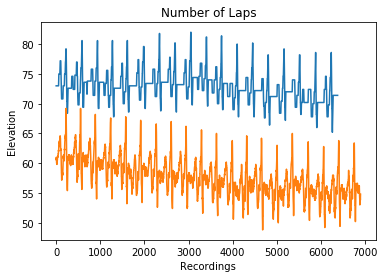

In [18]:
# Compare changes in elevation between each rider
ele = df['Elevation'].astype(float)
ele2 = df2['Elevation'].astype(float)
plt.plot(df.index,ele)
plt.plot(df2.index,ele2)
plt.title('Number of Laps')
plt.xlabel('Recordings')
plt.ylabel('Elevation')

##  
## Time Taken for Each Lap by Each Rider

### Rider in Race 1

In [19]:
# Create an array that records the current time taken since the beggining of the race
# after each lap has been completed.
laps = []
increasing = True
for i in range (1,df.shape[0]):
    if increasing == True and df['Latitude'][i] < df['Latitude'][i - 1] and df['Latitude'][i] < df['Latitude'][0]:
        increasing = False
    
    if (increasing == False and df['Latitude'][i] > df['Latitude'][0] and
        df['Latitude'][i] > df['Latitude'][i - 1] and df.index[i-1] != 0):
        laps.append(df.index[i])
        increasing = True


# Subtract the total time taken for the previous lap completion with the current time taken  
# for the current lap completion.
previouslap = 0
for i in range(0,len(laps)):
    print("The time taken for lap",i+1,"is",laps[i] - previouslap,"seconds.")
    previouslap = laps[i]

The time taken for lap 1 is 381 seconds.
The time taken for lap 2 is 356 seconds.
The time taken for lap 3 is 341 seconds.
The time taken for lap 4 is 338 seconds.
The time taken for lap 5 is 359 seconds.
The time taken for lap 6 is 360 seconds.
The time taken for lap 7 is 356 seconds.
The time taken for lap 8 is 352 seconds.
The time taken for lap 9 is 361 seconds.
The time taken for lap 10 is 340 seconds.
The time taken for lap 11 is 349 seconds.
The time taken for lap 12 is 353 seconds.
The time taken for lap 13 is 354 seconds.
The time taken for lap 14 is 351 seconds.
The time taken for lap 15 is 359 seconds.
The time taken for lap 16 is 355 seconds.
The time taken for lap 17 is 361 seconds.
The time taken for lap 18 is 342 seconds.


### Rider in Race 2

In [20]:
# Create an array that records the current time taken since the beggining of the race
# after each lap has been completed.
laps2 = []
increasing2 = True
for i in range (1,df2.shape[0]):
    if increasing2 == True and lat2[i] < lat2[i - 1] and lat2[i] < lat2[0]:
        increasing2 = False
    
    if  increasing2 == False and lat2[i] > lat2[0] and lat2[i] > lat2[i - 1] and df2.index[i-1] != 0:
        laps2.append(df2.index[i])
        increasing2 = True

# Subtract the total time taken for the previous lap completion with the current time taken  
# for the current lap completion.
previouslap2 = 0
for i in range(0,len(laps2)):
    print("The time taken for lap",i+1,"is",laps2[i] - previouslap2,"seconds.")
    previouslap2 = laps2[i]

The time taken for lap 1 is 369 seconds.
The time taken for lap 2 is 331 seconds.
The time taken for lap 3 is 343 seconds.
The time taken for lap 4 is 340 seconds.
The time taken for lap 5 is 335 seconds.
The time taken for lap 6 is 346 seconds.
The time taken for lap 7 is 347 seconds.
The time taken for lap 8 is 336 seconds.
The time taken for lap 9 is 344 seconds.
The time taken for lap 10 is 347 seconds.
The time taken for lap 11 is 338 seconds.
The time taken for lap 12 is 352 seconds.
The time taken for lap 13 is 328 seconds.
The time taken for lap 14 is 344 seconds.
The time taken for lap 15 is 344 seconds.
The time taken for lap 16 is 359 seconds.
The time taken for lap 17 is 358 seconds.
The time taken for lap 18 is 339 seconds.
The time taken for lap 19 is 355 seconds.
The time taken for lap 20 is 324 seconds.


##  
## The Fastest Rider
As shown above, the rider in race 2 had the fastest average speed of 10.4 m/s (37.6 km/hr) while the rider in race 1 could only achieve an average speed of 10.2 m/s (36.6 km/hr). The rider in race 1 completed 18 laps while the rider in race 2 completed 20 laps. However, the rider in race 2 completed 18 laps faster than the rider in race 1.

In [21]:
print("The rider in race 1 completed 18 laps in", laps[17],'seconds(approximately', int(laps[17]/60),'minutes).')
print("The rider in race 2 completed 18 laps in", laps2[17],'seconds(approximately', int(laps2[17]/60),'minutes).')

The rider in race 1 completed 18 laps in 6368 seconds(approximately 106 minutes).
The rider in race 2 completed 18 laps in 6200 seconds(approximately 103 minutes).
